# Exploratory Data Analysis - Traffic Violations in USA

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [4]:
#display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
path = 'data/Traffic_Violations.csv'
data = pd.read_csv(path, low_memory=False)

In [6]:
data.head()

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,09/24/2013,17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2008.0,FORD,4S,BLACK,Citation,13-401(h),Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN
1,12/20/2012,00:41:00,MCP,"2nd district, Bethesda",DRIVING WHILE IMPAIRED BY ALCOHOL,NORFOLK AVE / ST ELMO AVE,38.983578,-77.093105,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2005.0,AUDI,4S,GRAY,Citation,21-902(b1),Transportation Article,No,WHITE,M,DERWOOD,MD,MD,A - Marked Patrol,"(38.9835782, -77.09310515)"
2,07/20/2012,23:12:00,MCP,"5th district, Germantown",FAILURE TO STOP AT STOP SIGN,WISTERIA DR @ WARING STATION RD,39.161810,-77.253581,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2002.0,TOYT,4S,RED,Citation,21-707(a),Transportation Article,No,ASIAN,F,GERMANTOWN,MD,MD,A - Marked Patrol,"(39.1618098166667, -77.25358095)"
3,03/19/2012,16:10:00,MCP,"2nd district, Bethesda",DRIVER USING HANDS TO USE HANDHELD TELEPHONE W...,CLARENDON RD @ ELM ST. N/,38.982731,-77.100755,No,No,No,No,No,No,No,No,No,No,VA,02 - Automobile,1996.0,HONDA,CIVIC,SILVER,Citation,21-1124.2(d2),Transportation Article,No,HISPANIC,M,ARLINGTON,VA,VA,A - Marked Patrol,"(38.9827307333333, -77.1007551666667)"
4,12/01/2014,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,No,Yes,No,No,No,No,No,No,MD,02 - Automobile,2001.0,HONDA,ACCORD,SILVER,Citation,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"


Let's check the size of dataframe

In [7]:
data.shape

(1018634, 35)

There are more than 1 million observations and 35 columns/features available in the data frame.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018634 entries, 0 to 1018633
Data columns (total 35 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Date Of Stop             1018634 non-null  object 
 1   Time Of Stop             1018634 non-null  object 
 2   Agency                   1018634 non-null  object 
 3   SubAgency                1018634 non-null  object 
 4   Description              1018625 non-null  object 
 5   Location                 1018632 non-null  object 
 6   Latitude                 933599 non-null   float64
 7   Longitude                933599 non-null   float64
 8   Accident                 1018634 non-null  object 
 9   Belts                    1018634 non-null  object 
 10  Personal Injury          1018634 non-null  object 
 11  Property Damage          1018634 non-null  object 
 12  Fatal                    1018634 non-null  object 
 13  Commercial License       1018634 non-null 

Looks like some of the value are null/NaN values. Let's check the persentage of missing values.

In [ ]:
def get_na_percentage():
    missVals = data.isna().sum()*100/data.shape[0]
    return missVals[missVals > 0].sort_values(ascending=False)

In [ ]:
get_na_percentage()

Geolocation     8.347944
Longitude       8.347944
Latitude        8.347944
Article         5.111257
Color           1.334238
Year            0.630845
DL State        0.091201
Model           0.016591
Driver City     0.013842
State           0.005792
Make            0.004712
Driver State    0.001080
Description     0.000884
Location        0.000196
dtype: float64

Out of 35 columns 14 columns are having NaN values. We can see Geolocation, Latitude and longitude are having equal percentage of missing values. Geolocation is a packed representation of Latitude and Longitude.

#### Unique Values

In [ ]:
data.nunique()

Date Of Stop                 1822
Time Of Stop                 1440
Agency                          1
SubAgency                       7
Description                 10561
Location                   155034
Latitude                   262305
Longitude                  291493
Accident                        1
Belts                           2
Personal Injury                 2
Property Damage                 2
Fatal                           2
Commercial License              2
HAZMAT                          2
Commercial Vehicle              2
Alcohol                         2
Work Zone                       2
State                          69
VehicleType                    33
Year                          276
Make                         3129
Model                       15488
Color                          26
Violation Type                  4
Charge                        979
Article                         2
Contributed To Accident         2
Race                            6
Gender        

Agency and Accedent columns are having only one value. There will be no use of these columns in data analysis.

In [8]:
data.drop(['Agency', 'Accident'], axis=1, inplace=True)

In [9]:
data.shape

(1018634, 33)

Now we are left with 33 columns in the dataframe.

We have seperate date and time columns, instead we can make them one datetime data type column which would be usefull for filtering and further analysis.

In [10]:
data.insert( loc =0, column = 'Timestamp', value = data['Date Of Stop'] + ' ' + data['Time Of Stop'])
data.drop(['Date Of Stop', 'Time Of Stop'], axis=1, inplace=True)
data.head()

,Timestamp,SubAgency,Description,Location,Latitude,Longitude,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,09/24/2013 17:11:00,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2008.0,FORD,4S,BLACK,Citation,13-401(h),Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN
1,12/20/2012 00:41:00,"2nd district, Bethesda",DRIVING WHILE IMPAIRED BY ALCOHOL,NORFOLK AVE / ST ELMO AVE,38.983578,-77.093105,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2005.0,AUDI,4S,GRAY,Citation,21-902(b1),Transportation Article,No,WHITE,M,DERWOOD,MD,MD,A - Marked Patrol,"(38.9835782, -77.09310515)"
2,07/20/2012 23:12:00,"5th district, Germantown",FAILURE TO STOP AT STOP SIGN,WISTERIA DR @ WARING STATION RD,39.161810,-77.253581,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2002.0,TOYT,4S,RED,Citation,21-707(a),Transportation Article,No,ASIAN,F,GERMANTOWN,MD,MD,A - Marked Patrol,"(39.1618098166667, -77.25358095)"
3,03/19/2012 16:10:00,"2nd district, Bethesda",DRIVER USING HANDS TO USE HANDHELD TELEPHONE W...,CLARENDON RD @ ELM ST. N/,38.982731,-77.100755,No,No,No,No,No,No,No,No,No,VA,02 - Automobile,1996.0,HONDA,CIVIC,SILVER,Citation,21-1124.2(d2),Transportation Article,No,HISPANIC,M,ARLINGTON,VA,VA,A - Marked Patrol,"(38.9827307333333, -77.1007551666667)"
4,12/01/2014 12:52:00,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,Yes,No,No,No,No,No,No,MD,02 - Automobile,2001.0,HONDA,ACCORD,SILVER,Citation,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"


In [11]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format = '%m/%d/%Y %H:%M:%S', dayfirst = True)

In [12]:
#also let's convert year column to integer format
data['Year'] = data['Year'].astype('Int64')

In [13]:
data.shape

(1018634, 32)

In [14]:
data.head()

,Timestamp,SubAgency,Description,Location,Latitude,Longitude,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,2013-09-24 17:11:00,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2008,FORD,4S,BLACK,Citation,13-401(h),Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN
1,2012-12-20 00:41:00,"2nd district, Bethesda",DRIVING WHILE IMPAIRED BY ALCOHOL,NORFOLK AVE / ST ELMO AVE,38.983578,-77.093105,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2005,AUDI,4S,GRAY,Citation,21-902(b1),Transportation Article,No,WHITE,M,DERWOOD,MD,MD,A - Marked Patrol,"(38.9835782, -77.09310515)"
2,2012-07-20 23:12:00,"5th district, Germantown",FAILURE TO STOP AT STOP SIGN,WISTERIA DR @ WARING STATION RD,39.161810,-77.253581,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2002,TOYT,4S,RED,Citation,21-707(a),Transportation Article,No,ASIAN,F,GERMANTOWN,MD,MD,A - Marked Patrol,"(39.1618098166667, -77.25358095)"
3,2012-03-19 16:10:00,"2nd district, Bethesda",DRIVER USING HANDS TO USE HANDHELD TELEPHONE W...,CLARENDON RD @ ELM ST. N/,38.982731,-77.100755,No,No,No,No,No,No,No,No,No,VA,02 - Automobile,1996,HONDA,CIVIC,SILVER,Citation,21-1124.2(d2),Transportation Article,No,HISPANIC,M,ARLINGTON,VA,VA,A - Marked Patrol,"(38.9827307333333, -77.1007551666667)"
4,2014-12-01 12:52:00,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,Yes,No,No,No,No,No,No,MD,02 - Automobile,2001,HONDA,ACCORD,SILVER,Citation,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"


### Univariate Analysis

In the univariate analysis we will analyse each column seperately without any influence of other columns.

In [15]:
def bar_plot(values, title = '', label_tick = 0, reverse_axis = False):
    dist = values.value_counts()
    # reverse axis for horizontal bar plot
    if reverse_axis:
        sns.barplot(x=dist, y=dist.index)
        plt.xlabel('Count')
        plt.ylabel(dist.name)
    else:
        sns.barplot(x=dist.index, y=dist)
        plt.xlabel(dist.name)
        plt.ylabel('Count')
    
    plt.xticks(rotation=label_tick)
    plt.title(title)

### Timestamp

Let's analyise the data time of traffic violation.

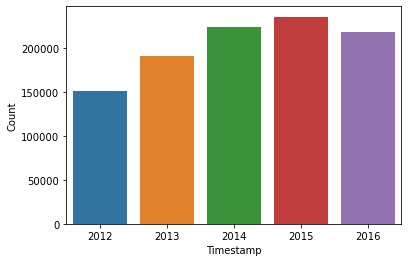

In [ ]:
bar_plot(data['Timestamp'].dt.year)

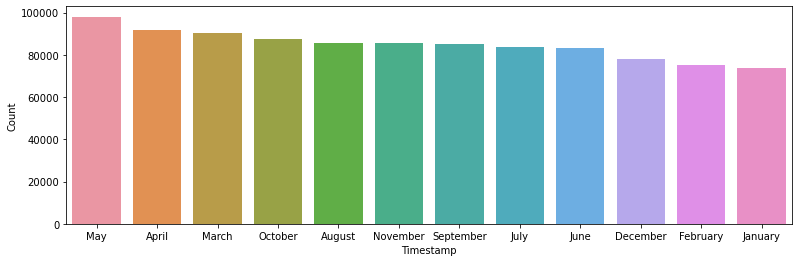

In [ ]:
plt.figure(figsize=[13,4])
bar_plot(data['Timestamp'].dt.month_name())

Less number of traffic violations happened at the end and very start of the year compared to rest of the year.

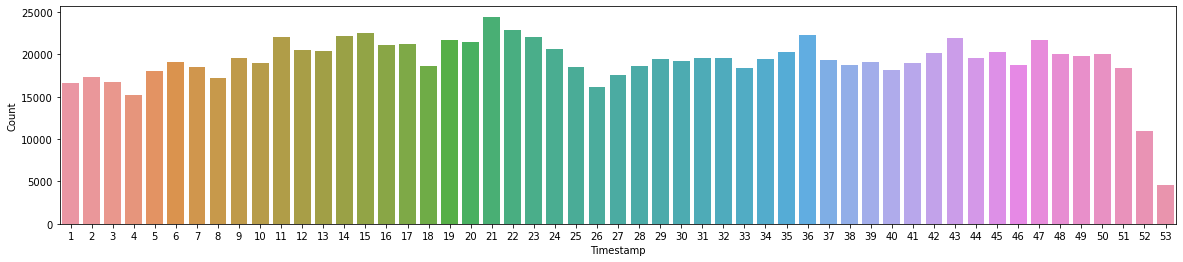

In [ ]:
plt.figure(figsize=[20,4])
bar_plot(data['Timestamp'].dt.week)

We can see the couple of weeks in the year (52, 53) are having very less number of traffic violations, this might be because of Christmas and New year eves

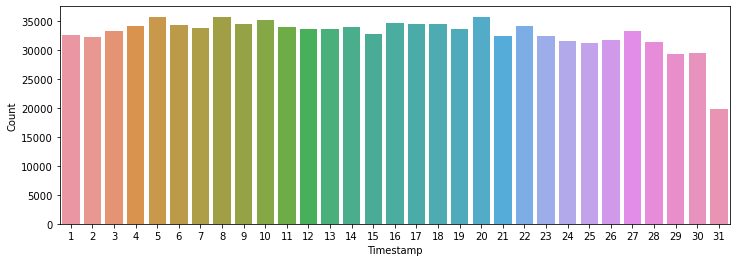

In [ ]:
plt.figure(figsize=[12,4])
bar_plot(data['Timestamp'].dt.day)

Similarly last day of month is already having very less number of traffic violations.

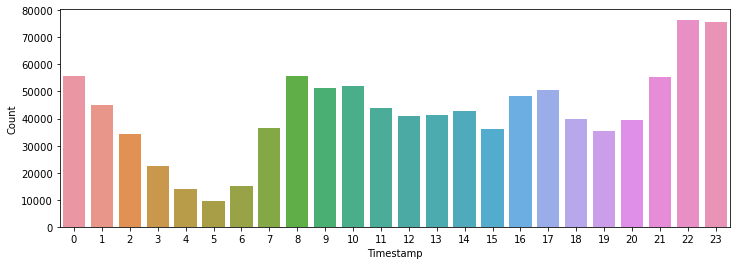

In [ ]:
plt.figure(figsize=[12,4])
bar_plot(data['Timestamp'].dt.hour)

This is an interesting finding, more number of the traffic violations happened in the mid night hours only while very less number of violations happened in the early mornings this might be because of very less number of people do travell in the early mornings.

### SubAgency

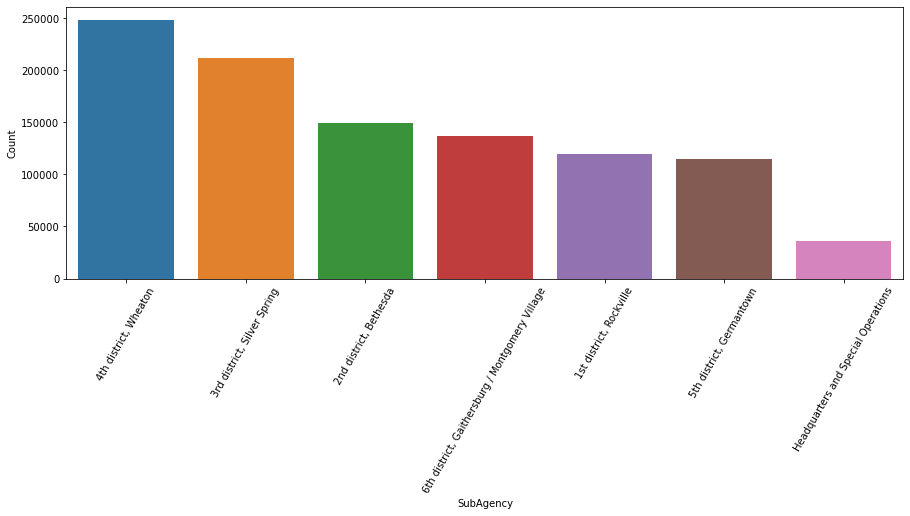

In [ ]:
plt.figure(figsize=[15,5])
bar_plot(data['SubAgency'], label_tick = 60)

In 4th district Wheaton sub agency we have more number of traffic violations, and very less number of violations are happened at headquarters & Special Ops SubAgency.

### Description

The description of violation is a text field, so we can not use regular EDA technique, let's use the word cloud to see what are the frequent words being used.

In [ ]:
description = " ".join([str(d) for d in data['Description']])

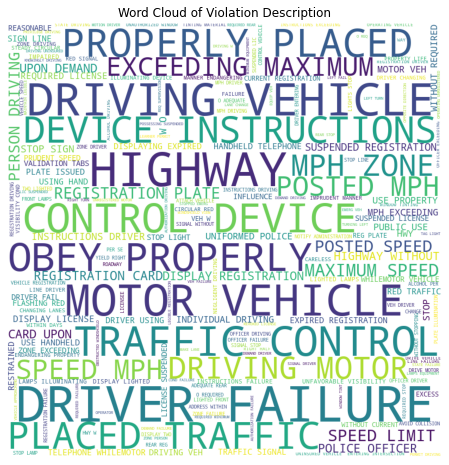

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 5).generate(description)

plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud of Violation Description")
plt.show()

We can see most violations are regarding **Excess Speed, Registration plate, Highway**, as these keys are highlighted and bigger font in the word cloud.

In [ ]:
def multi_bar_plot(columns, no_of_cols = 3):
    rows = int(len(columns)/no_of_cols + 0.5)
    for i, col in enumerate(columns):
        plt.subplot(rows, no_of_cols, i+1)
        dist = data[col].value_counts()
        sns.barplot(x=dist.index, y=dist)
        plt.ylabel('Count')
        plt.xlabel(dist.name)
        plt.title(dist.name + ' Distribution')

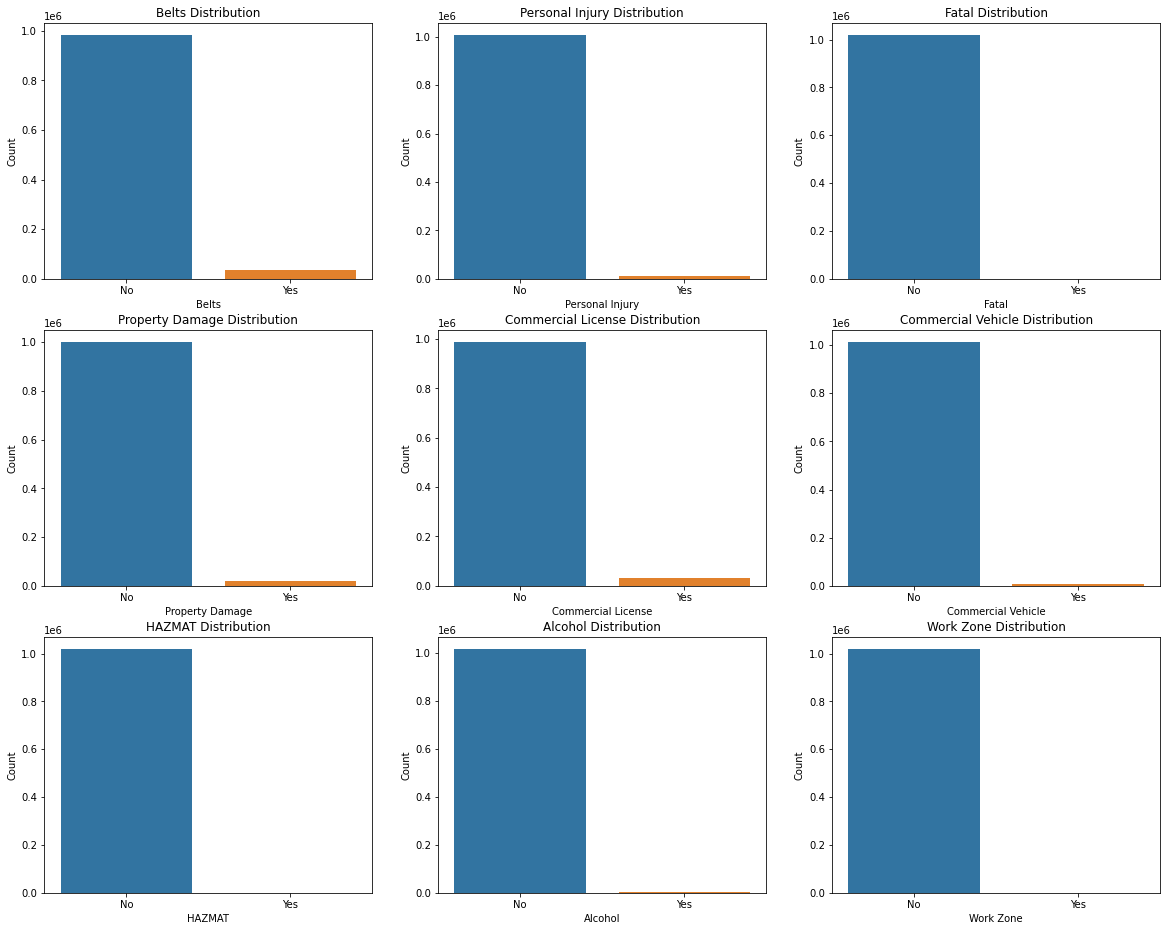

In [ ]:
plt.figure(figsize=[20,16])
multi_bar_plot(['Belts', 'Personal Injury', 'Fatal', 'Property Damage',
               'Commercial License', 'Commercial Vehicle', 'HAZMAT', 'Alcohol', 'Work Zone'])

All the above 9 graphs are very skewed and 99% of times the values are No. We can see individually most of the traffic vilations are no fatal, not carrying any Hazardous material(HAZMAT) or any alcohol in the vehicle. And rougly 1% of vehicles are having commercial vehcles withs commercial licence.

### Vehicle Details

We have vehicle details like vehicleType, Year of manufacturing, Maker, Model and Color. Let's Explore these details.

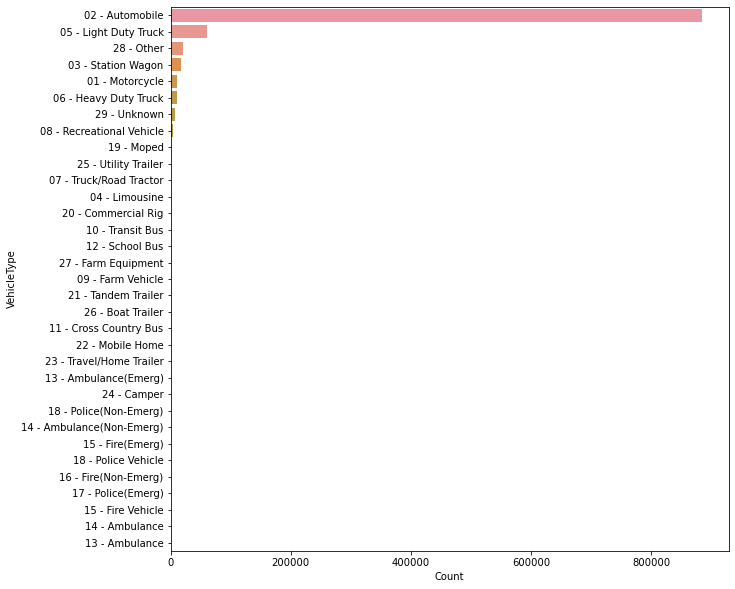

In [ ]:
plt.figure(figsize=[10,10])
bar_plot(data['VehicleType'], reverse_axis=True)

Over 90% of vehicles are Automobile & Light Duty Trucks only.

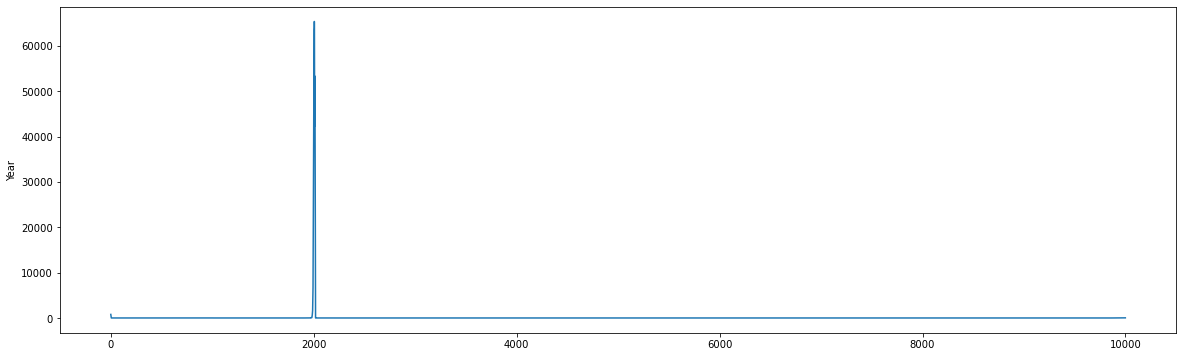

In [21]:
years = data['Year'].value_counts().sort_index()
plt.figure(figsize=[20,6])
sns.lineplot(x=years.index, y=years)

We can see there are allot of random number because the year is more than 2016 which is the highest year of traffic violation creations. Let's see the stats of the this variable.

In [17]:
years.describe(percentiles = [0.25, 0.5, 0.75, 0.85, 0.9, 0.95])

count      276.000000
mean      3667.420290
std      12887.133571
min          1.000000
25%          1.000000
50%          2.000000
75%         11.000000
85%         65.000000
90%       1556.500000
95%      39122.500000
max      65365.000000
Name: Year, dtype: float64

We can see 90% of data is less than 1000, let's plot the values over 90 percentil.

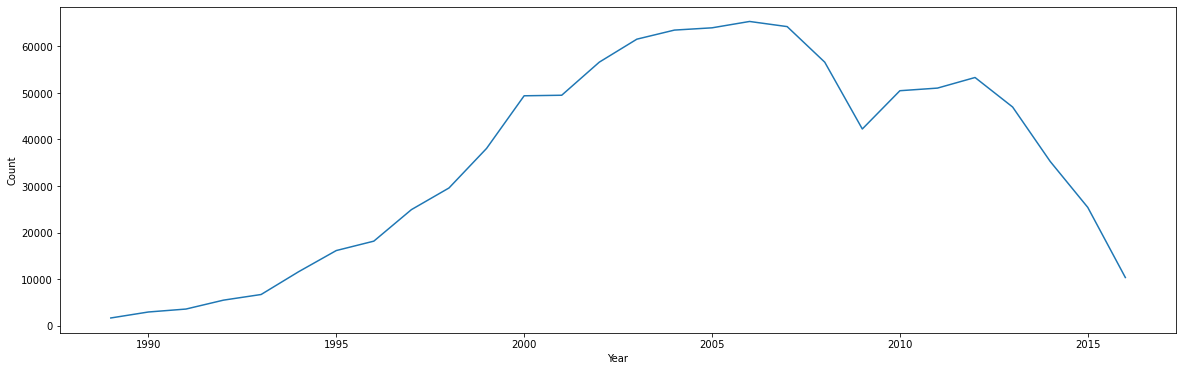

In [22]:
years = years[years >= np.percentile(years, 90)]
plt.figure(figsize=[20,6])
sns.lineplot(x=years.index, y=years)
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

Most of the cars are manufactured in 2004 to 2006, and this distribution is almost near to normal distribution.

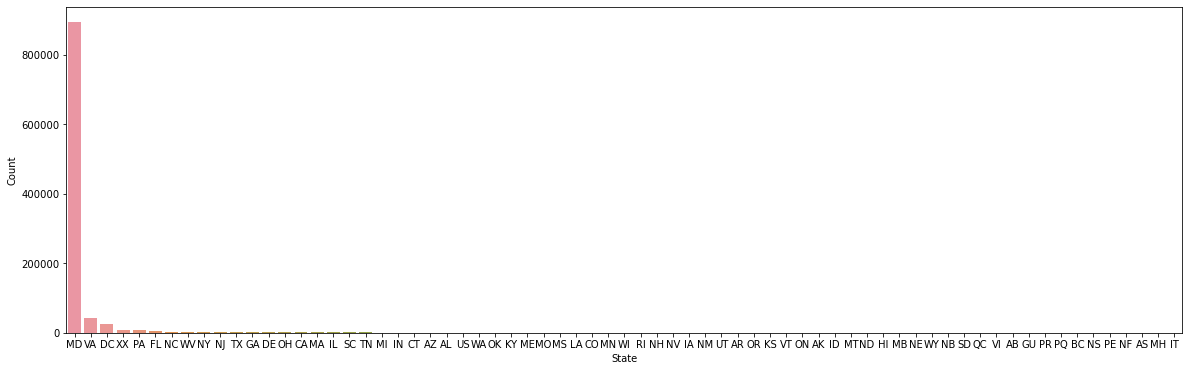

In [ ]:
plt.figure(figsize=[20,6])
bar_plot(data['State'])

Its not a surprise that over 85% of the vehicles involved in violation are mostly register in MD (Maryland) State, as the data is from MCP which is Police department of MD. And Veginia and DC has next highest as they are neighbouring states of Maryland.

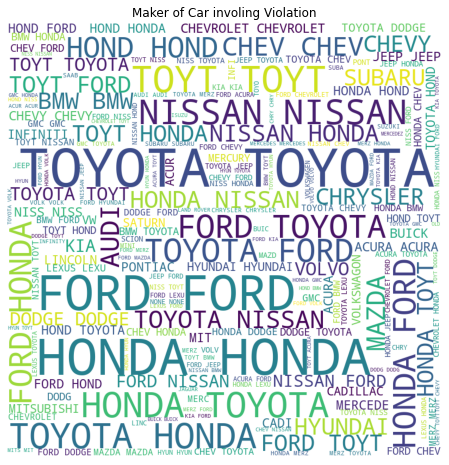

In [ ]:
make = " ".join([str(m) for m in data['Make']])
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 5).generate(make)

plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Maker of Car involing Violation")
plt.show()

Toyota, Honda and Ford vehicles are in more number of violations. Let's check the desriptive stats for make feature.

In [ ]:
data['Make'].value_counts()*100/data.shape[0]

TOYOTA         10.978428
HONDA          10.415321
FORD            9.528349
TOYT            5.687028
NISSAN          5.161618
                 ...    
VOLKVAL2006     0.000098
HYUNDAI/        0.000098
TAOTO           0.000098
ISZ             0.000098
HUNDAYI         0.000098
Name: Make, Length: 3129, dtype: float64

Both Toyota and Toyt are same, so around 15% of toyata vehicles involved in violations followed by Honda and Ford.

### Violation & Action Info

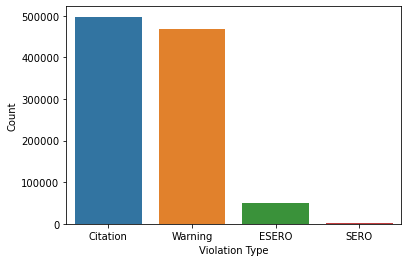

In [ ]:
bar_plot(data['Violation Type'])

Roughly 50% of Violations are Citations and 45% are Warnings.

Transportation Article    0.937916
Maryland Rules            0.010972
Name: Article, dtype: float64

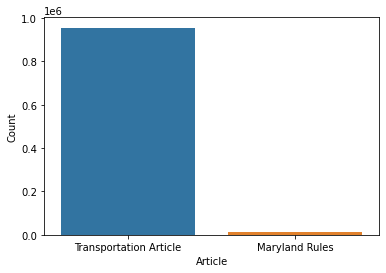

In [ ]:
bar_plot(data['Article'])
data['Article'].value_counts()/data.shape[0]

Article of State Law has two distinct values. Transportation Article laws are applied in 93% of cases.

In [ ]:
data['Charge'].value_counts()*100/data.shape[0]

21-801.1        13.394507
21-201(a1)       7.820179
13-409(b)        4.813505
13-401(h)        3.757287
21-707(a)        3.219900
                  ...    
11-392.11        0.000098
11-392.10(a)     0.000098
13-420(b)        0.000098
21-10A04A(5)     0.000098
15-402(a)        0.000098
Name: Charge, Length: 979, dtype: float64

All the charge codes related data can be resolved from https://law.justia.com/codes/maryland/2005/gtr.html. The top Charge codes 21-801.1 (Exceeding Speed limit), 21-201(a1) didnt obey traffic law regarding emergency vehicle and other.

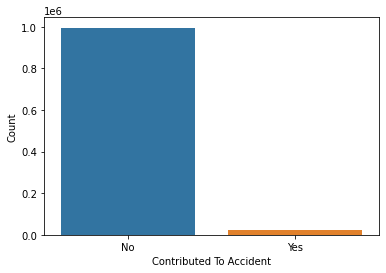

In [ ]:
bar_plot(data['Contributed To Accident'])

Only 2% of Violations contributed to the accident.

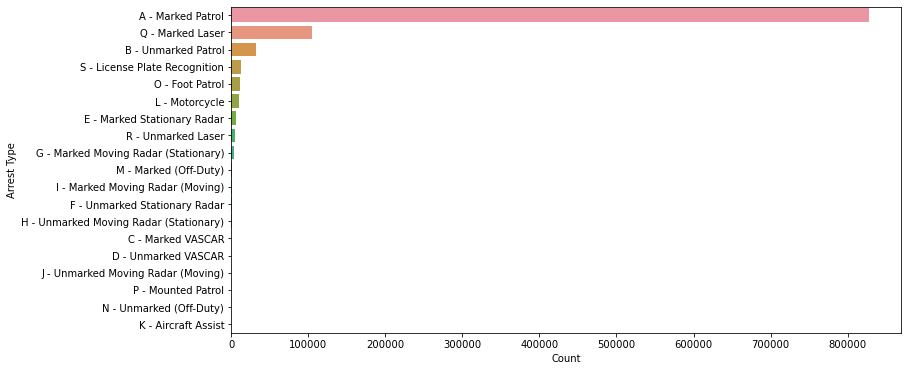

In [ ]:
plt.figure(figsize=[12, 6])
bar_plot(data['Arrest Type'], reverse_axis=True)

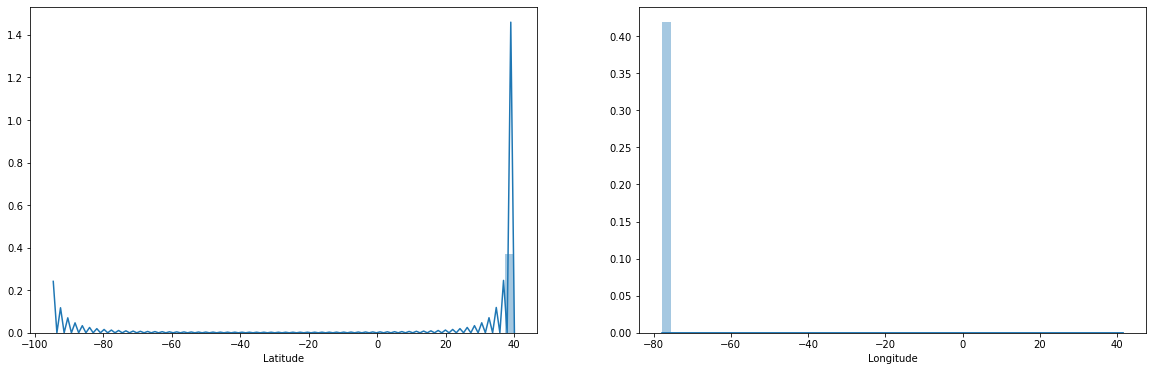

In [ ]:
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
sns.distplot(data['Latitude'])
plt.subplot(1,2,2)
sns.distplot(data['Longitude'])
plt.show()

There is some wrong values being entered in Latitude some values are less than -90, but the range of latitude is 90 and -90 only.

### Driver Info

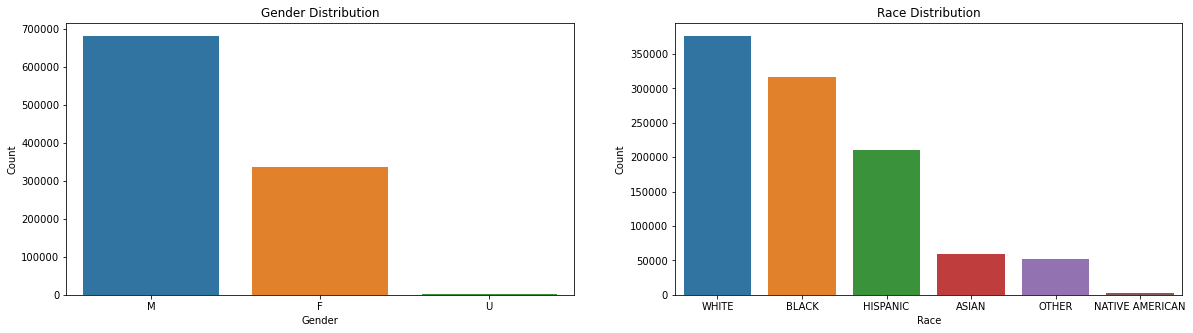

In [ ]:
plt.figure(figsize=[20, 5])
multi_bar_plot(['Gender', 'Race'], no_of_cols=2)

Interestingly 60% of violations are done by Male. Also 60% violations are done by white and black race people.

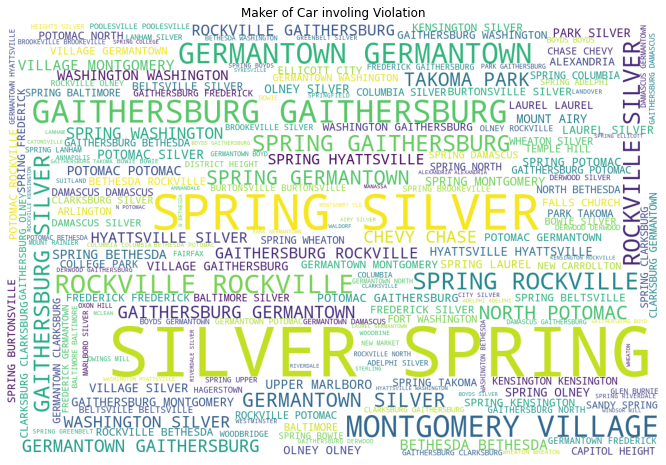

In [ ]:
dcity = " ".join([str(m) for m in data['Driver City']])
wordcloud = WordCloud(width = 1200, height = 800,
                background_color ='white',
                min_font_size = 5).generate(dcity)

plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Maker of Car involing Violation")
plt.show()

Most driver's home city is Silver spring, Gaithersbung and Montgomery Village. All these cities are in maryland.

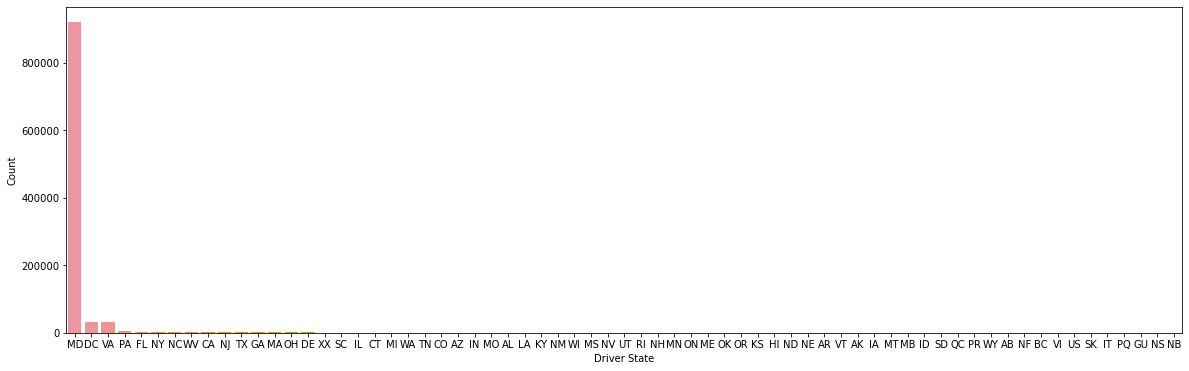

In [ ]:
plt.figure(figsize=[20,6])
bar_plot(data['Driver State'])

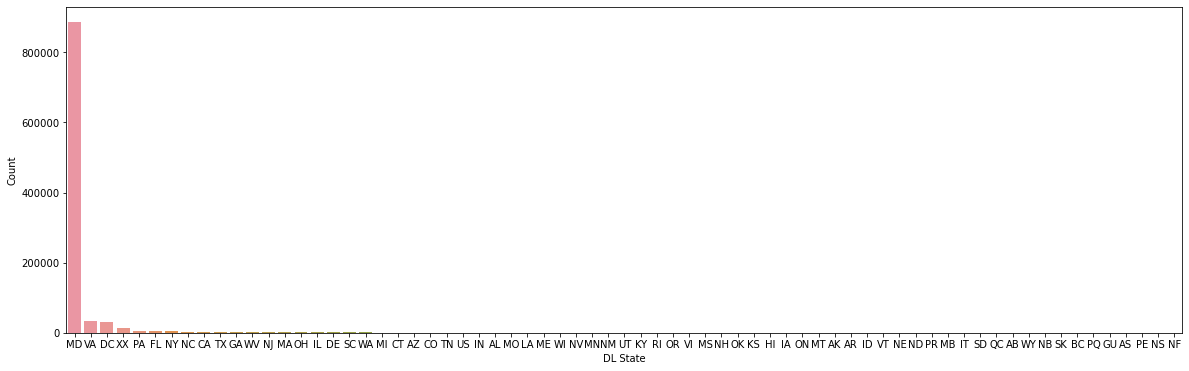

In [ ]:
plt.figure(figsize=[20,6])
bar_plot(data['DL State'])

Both Diver's home state and Driver's licence issued state are Maryland only because the dataset is from MCP agency.

## Bivariate Analysis

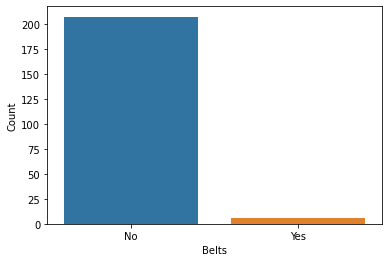

In [ ]:
df = data[data['Fatal'] == 'Yes']['Belts']
bar_plot(df)

When Driver's has seat belt the Fatality is very less i.e., around 3%.

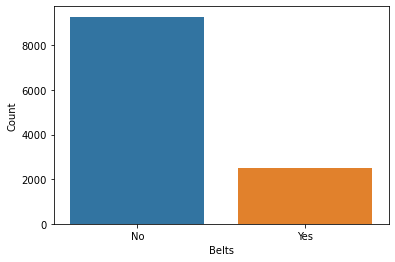

In [ ]:
df = data[data['Personal Injury'] == 'Yes']['Belts']
bar_plot(df)

A similar case with Personal Injuries, there is less risk of personal injuries when people on vehicle wore seat belts.

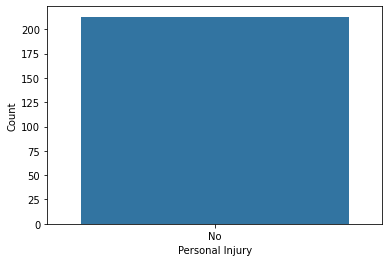

In [ ]:
df = data[data['Fatal'] == 'Yes']['Personal Injury']
bar_plot(df)

In [ ]:
data.groupby('Fatal')['Personal Injury'].value_counts()

Fatal  Personal Injury
No     No                 1006647
       Yes                  11774
Yes    No                     213
Name: Personal Injury, dtype: int64

Looks like there is no correlation between Personal Injury and Fatal at all.

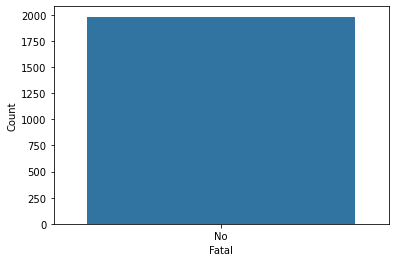

In [ ]:
df = data[data['Alcohol'] == 'Yes']['Fatal']
bar_plot(df)

In [ ]:
data.groupby('Fatal')['Alcohol'].value_counts()

Fatal  Alcohol
No     No         1016438
       Yes           1983
Yes    No             213
Name: Alcohol, dtype: int64

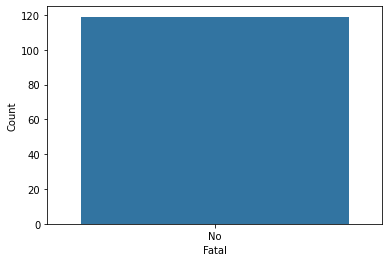

In [ ]:
df = data[data['HAZMAT'] == 'Yes']['Fatal']
bar_plot(df)

Alcohol or Hazardous Metrails found on violation are related to the Fatal.

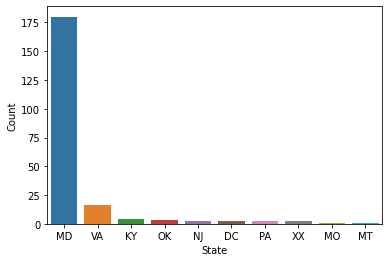

In [ ]:
bar_plot(data[data['Fatal'] == 'Yes']['State'])

The vehicles registered state's distribution is almost similar to one with Fatal. Maryland state's vahicles are more followed by VA

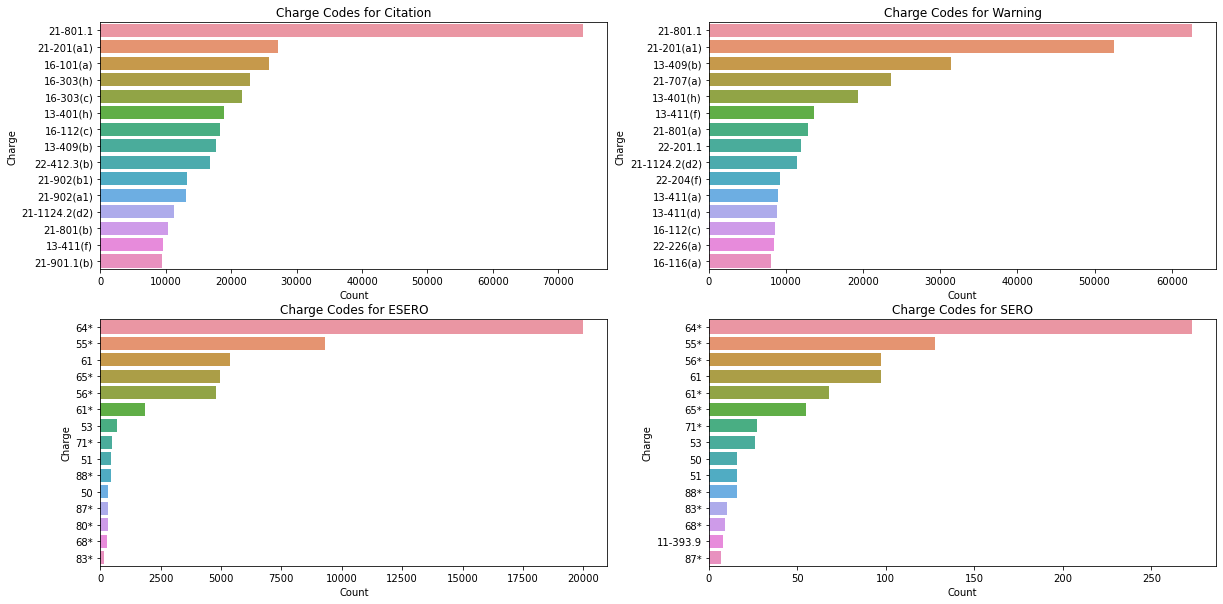

In [ ]:
df = data.groupby('Violation Type')['Charge'].value_counts()
grid = int(len(data['Violation Type'].unique())/2 + 0.5)
plt.figure(figsize=[20,10])

for i, vt in enumerate(data['Violation Type'].unique()):
    d = df.xs(vt)[:15]
    plt.subplot(grid, 2, i+1)
    sns.barplot(x = d, y = d.index)
    plt.title("Charge Codes for "+vt)
    plt.xlabel("Count")
    plt.ylabel("Charge")

The top Violation charge codes for Citiation & Warning are related to excess speed/slow speed, Invalid Licence/expired licence. The charge codes are almost same for Citation and Warning, and ESERO & SERO(Safety Equip. Repair Order).

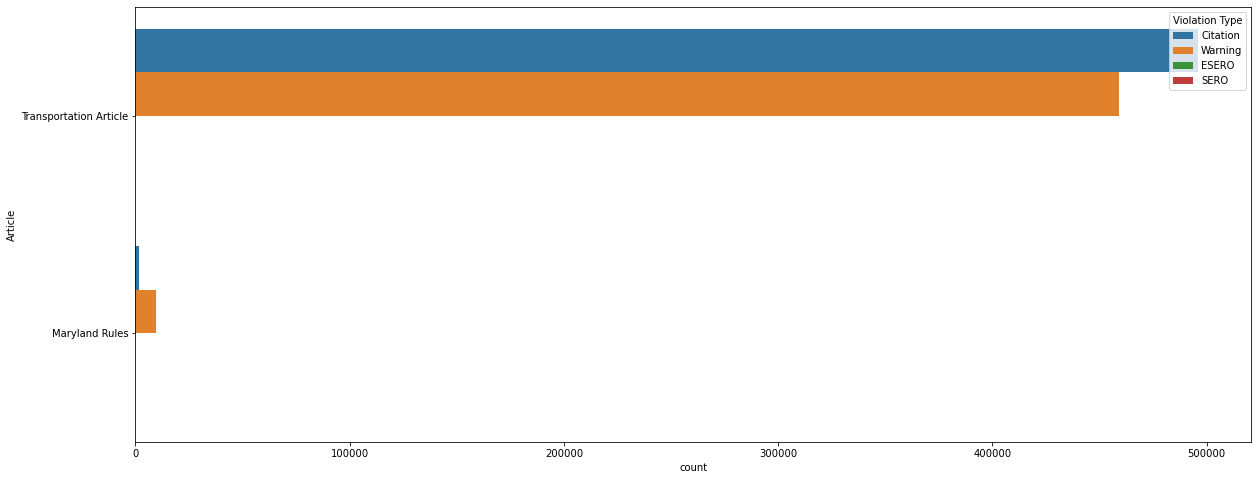

In [ ]:
plt.figure(figsize=[20,8])
sns.countplot(y=data['Article'], hue='Violation Type', data=data)

In [ ]:
data.groupby('Article')['Violation Type'].value_counts()

Article                 Violation Type
Maryland Rules          Warning             9650
                        Citation            1503
                        SERO                  23
Transportation Article  Citation          496100
                        Warning           459293
Name: Violation Type, dtype: int64

Over 90% the Citation & Warning Violations are based on Transportation Articles and rest are based on Maryland Rules. ESERO Violations are made for undefined article.

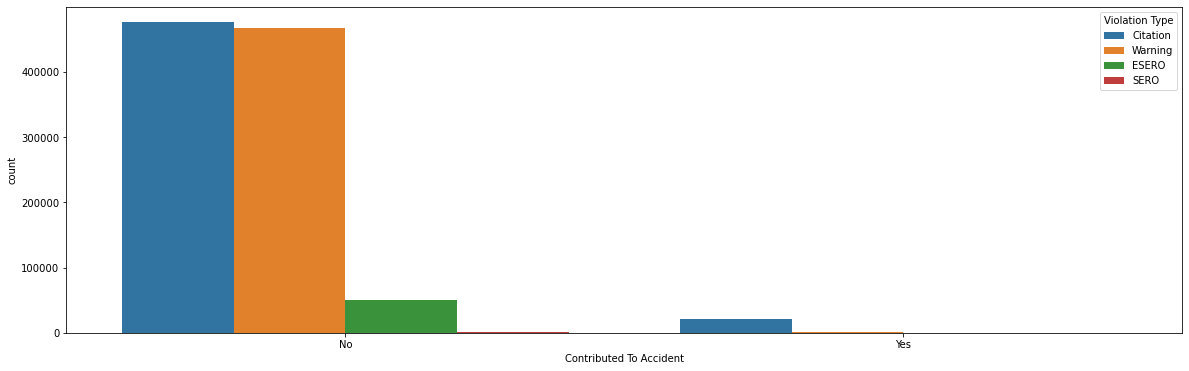

In [ ]:
plt.figure(figsize=[20,6])
sns.countplot(data['Contributed To Accident'], hue='Violation Type', data=data)

In [ ]:
data.groupby('Contributed To Accident')['Violation Type'].value_counts()

Contributed To Accident  Violation Type
No                       Citation          476111
                         Warning           467037
                         ESERO              50943
                         SERO                 912
Yes                      Citation           21504
                         Warning             1937
                         ESERO                180
                         SERO                  10
Name: Violation Type, dtype: int64

When the Vehicle Violation Contributed to Accident 90% of cases Violation type is Citation, which is only 50% when not contributed to accident.

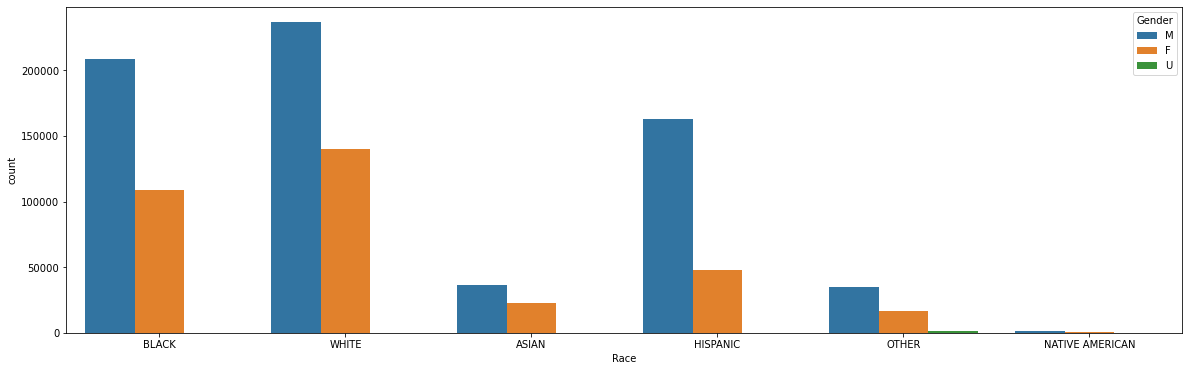

In [ ]:
plt.figure(figsize=[20,6])
sns.countplot(data['Race'], hue='Gender', data=data)

This is really interesting the male & female are distributed same accross different races. The Count of Female driver's are between 40-60 percent of male driver's count.

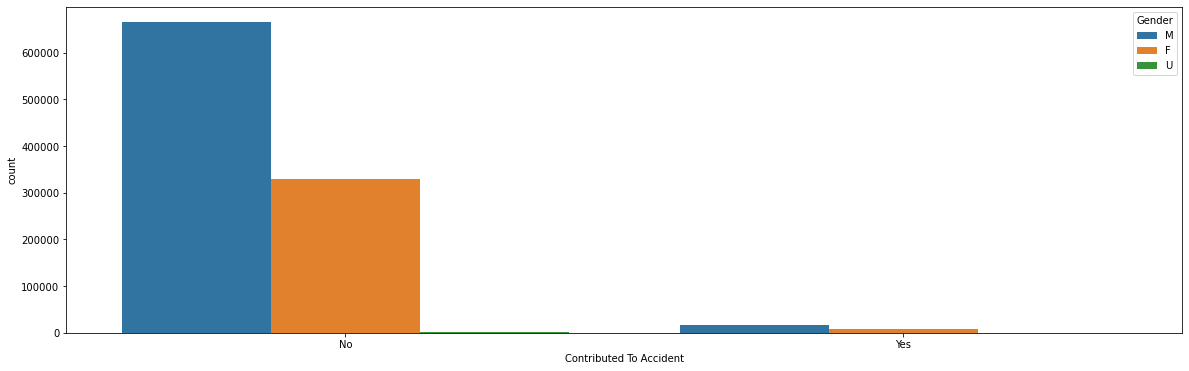

In [ ]:
plt.figure(figsize=[20,6])
sns.countplot(data['Contributed To Accident'], hue='Gender', data=data)

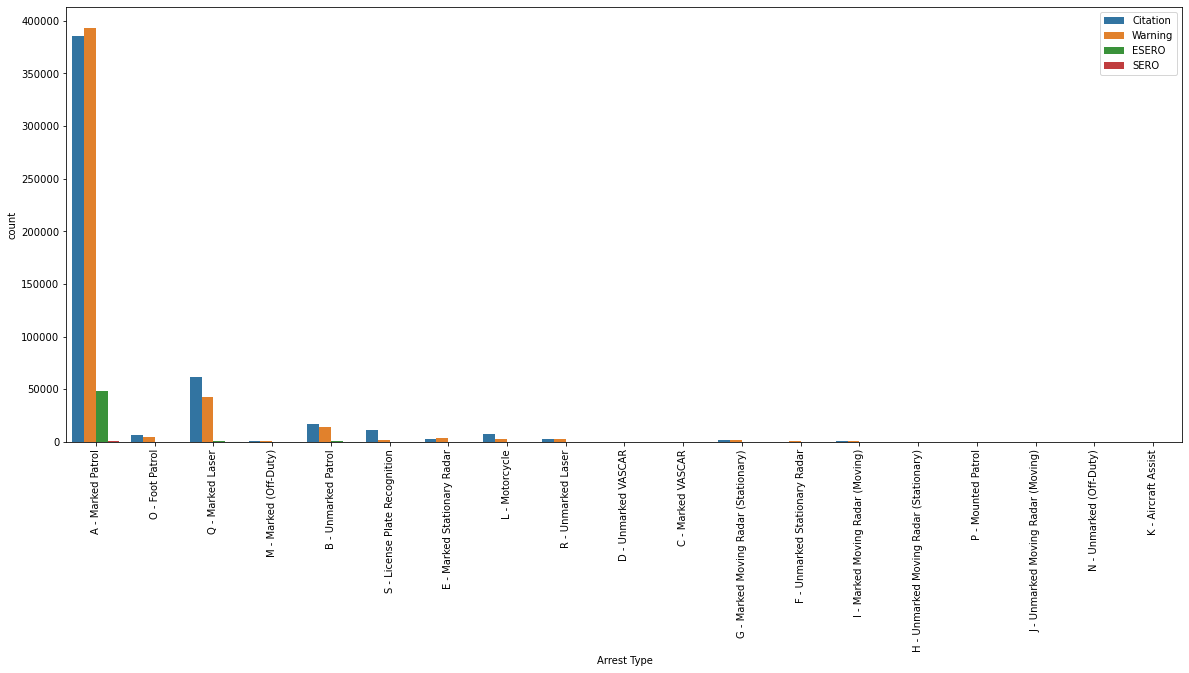

In [ ]:
plt.figure(figsize=[20, 8])
sns.countplot(x=data['Arrest Type'], hue='Violation Type', data=data)
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

There are more Warnings than Citations in Marked Patrol, and for other arrest types its vice versa.

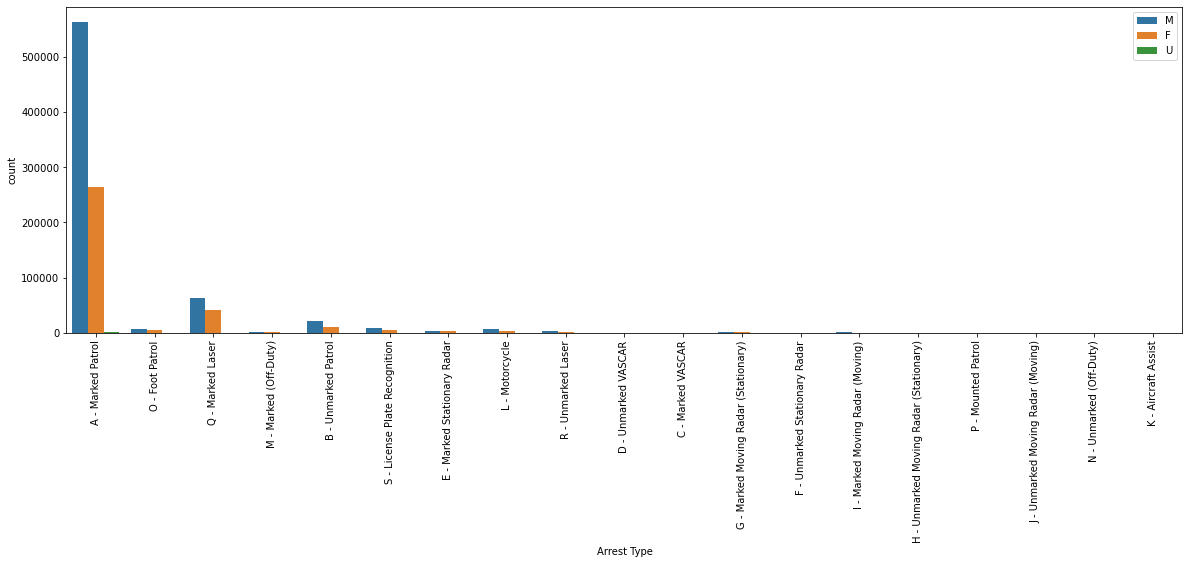

In [ ]:
plt.figure(figsize=[20, 6])
sns.countplot(x=data['Arrest Type'], hue='Gender', data=data)
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

There is no clear indication that female or male are charged with specific arrest type.

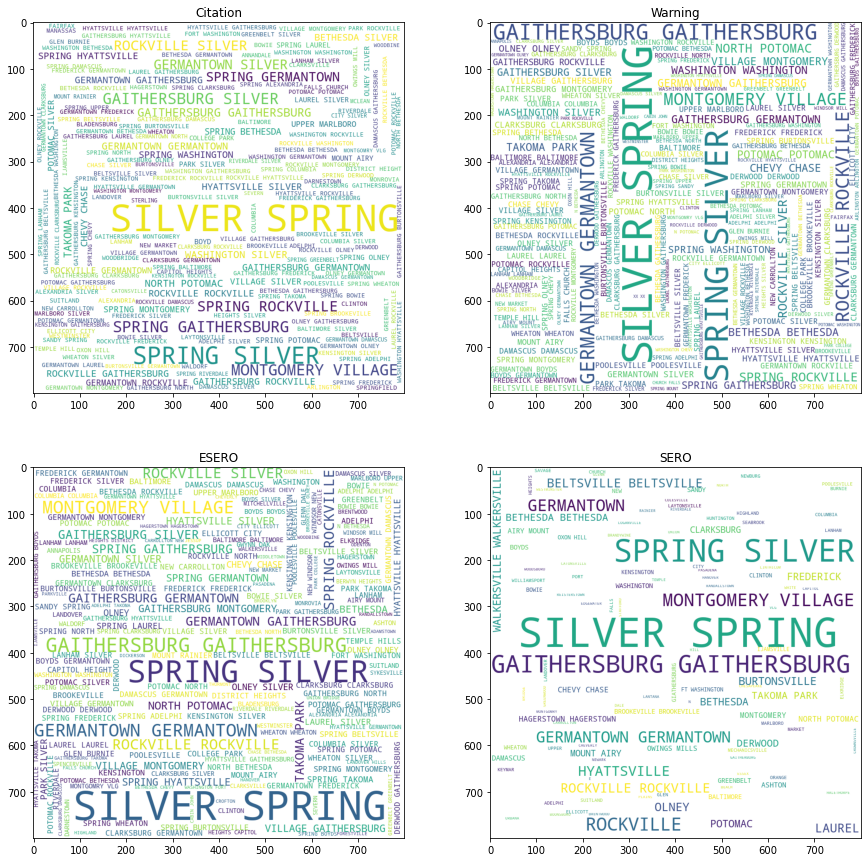

In [ ]:
grid = int(len(data['Violation Type'].unique())/2 + 0.5)
plt.figure(figsize=[15,15])

for i, vt in enumerate(data['Violation Type'].unique()):
    dcity = " ".join([str(m) for m in data[data['Violation Type'] == vt]['Driver City']])
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    min_font_size = 5).generate(dcity)
    plt.subplot(grid, 2, i+1)
    plt.imshow(wordcloud)
    plt.title(vt)

plt.show()

Looks like there was no correlation between Driver City and Violation type. Almost the Cities are similar in all the violation types

In [ ]:
df = data[~data['Year'].isna() & (data['Year'] >= 1990) & (data['Year'] <= 2016)]
df = df.groupby('Violation Type')['Year'].value_counts().sort_index() 

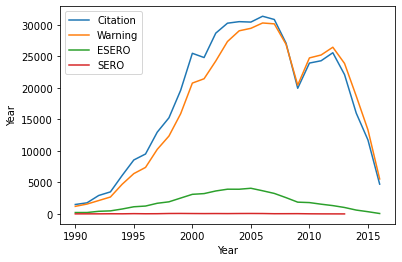

In [ ]:
for vt in data['Violation Type'].unique():
    sns.lineplot(x=df.loc[vt].index, y=df.loc[vt])

plt.legend(data['Violation Type'].unique())
plt.show()

As we have more percentage of Citation and Warning Violations, the year distribution for both of them is almost same. And there is a flat line for SERO and the ESERO vs year is having very less bumpy curve as we have very less number of violations for these two.

### Correlations

Before Computing Correlation between variables using heatmap we should convert all the text variable to one hot encoding.

In [11]:
binary_cols = ['Belts', 'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License', 'HAZMAT', 
                   'Commercial Vehicle', 'Alcohol', 'Work Zone', 'Article', 'Contributed To Accident']
for col in binary_cols:
    data[col] = data[col].apply(lambda x: 1 if x == 'Yes' else 0)

In [12]:
#for gender the Unknown values will be mapped to 1 only as male are higher in number
data['Gender'] = data['Gender'].apply(lambda x: 0 if x == 'F' else 1)

In [13]:
data = pd.concat([data, pd.get_dummies(data['Violation Type'], prefix='Violation Type', dummy_na=True)], axis=1)
data = pd.concat([data, pd.get_dummies(data['Race'], prefix='Race', dummy_na=True)], axis=1)
data = pd.concat([data, pd.get_dummies(data['SubAgency'], prefix='SubAgency', dummy_na=True)], axis=1)

In [14]:
#droping the original columns
data.drop(['Violation Type', 'Race', 'SubAgency'], axis=1, inplace=True)

In [15]:
data.head()

,Timestamp,Description,Location,Latitude,Longitude,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,Model,Color,Charge,Article,Contributed To Accident,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation,Violation Type_Citation,Violation Type_ESERO,Violation Type_SERO,Violation Type_Warning,Violation Type_nan,Race_ASIAN,Race_BLACK,Race_HISPANIC,Race_NATIVE AMERICAN,Race_OTHER,Race_WHITE,Race_nan,"SubAgency_1st district, Rockville","SubAgency_2nd district, Bethesda","SubAgency_3rd district, Silver Spring","SubAgency_4th district, Wheaton","SubAgency_5th district, Germantown","SubAgency_6th district, Gaithersburg / Montgomery Village",SubAgency_Headquarters and Special Operations,SubAgency_nan
0,2013-09-24 17:11:00,DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,0,0,0,0,0,0,0,0,0,MD,02 - Automobile,2008,FORD,4S,BLACK,13-401(h),0,0,1,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2012-12-20 00:41:00,DRIVING WHILE IMPAIRED BY ALCOHOL,NORFOLK AVE / ST ELMO AVE,38.983578,-77.093105,0,0,0,0,0,0,0,0,0,MD,02 - Automobile,2005,AUDI,4S,GRAY,21-902(b1),0,0,1,DERWOOD,MD,MD,A - Marked Patrol,"(38.9835782, -77.09310515)",1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,2012-07-20 23:12:00,FAILURE TO STOP AT STOP SIGN,WISTERIA DR @ WARING STATION RD,39.161810,-77.253581,0,0,0,0,0,0,0,0,0,MD,02 - Automobile,2002,TOYT,4S,RED,21-707(a),0,0,0,GERMANTOWN,MD,MD,A - Marked Patrol,"(39.1618098166667, -77.25358095)",1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2012-03-19 16:10:00,DRIVER USING HANDS TO USE HANDHELD TELEPHONE W...,CLARENDON RD @ ELM ST. N/,38.982731,-77.100755,0,0,0,0,0,0,0,0,0,VA,02 - Automobile,1996,HONDA,CIVIC,SILVER,21-1124.2(d2),0,0,1,ARLINGTON,VA,VA,A - Marked Patrol,"(38.9827307333333, -77.1007551666667)",1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,2014-12-01 12:52:00,FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,0,0,1,0,0,0,0,0,0,MD,02 - Automobile,2001,HONDA,ACCORD,SILVER,21-403(b),0,0,0,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)",1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [16]:
data.shape

(1018634, 49)

In [80]:
df = data.dropna()

In [81]:
corr = df.corr()
corr.fillna(0, inplace=True)
corr = corr.round(2)

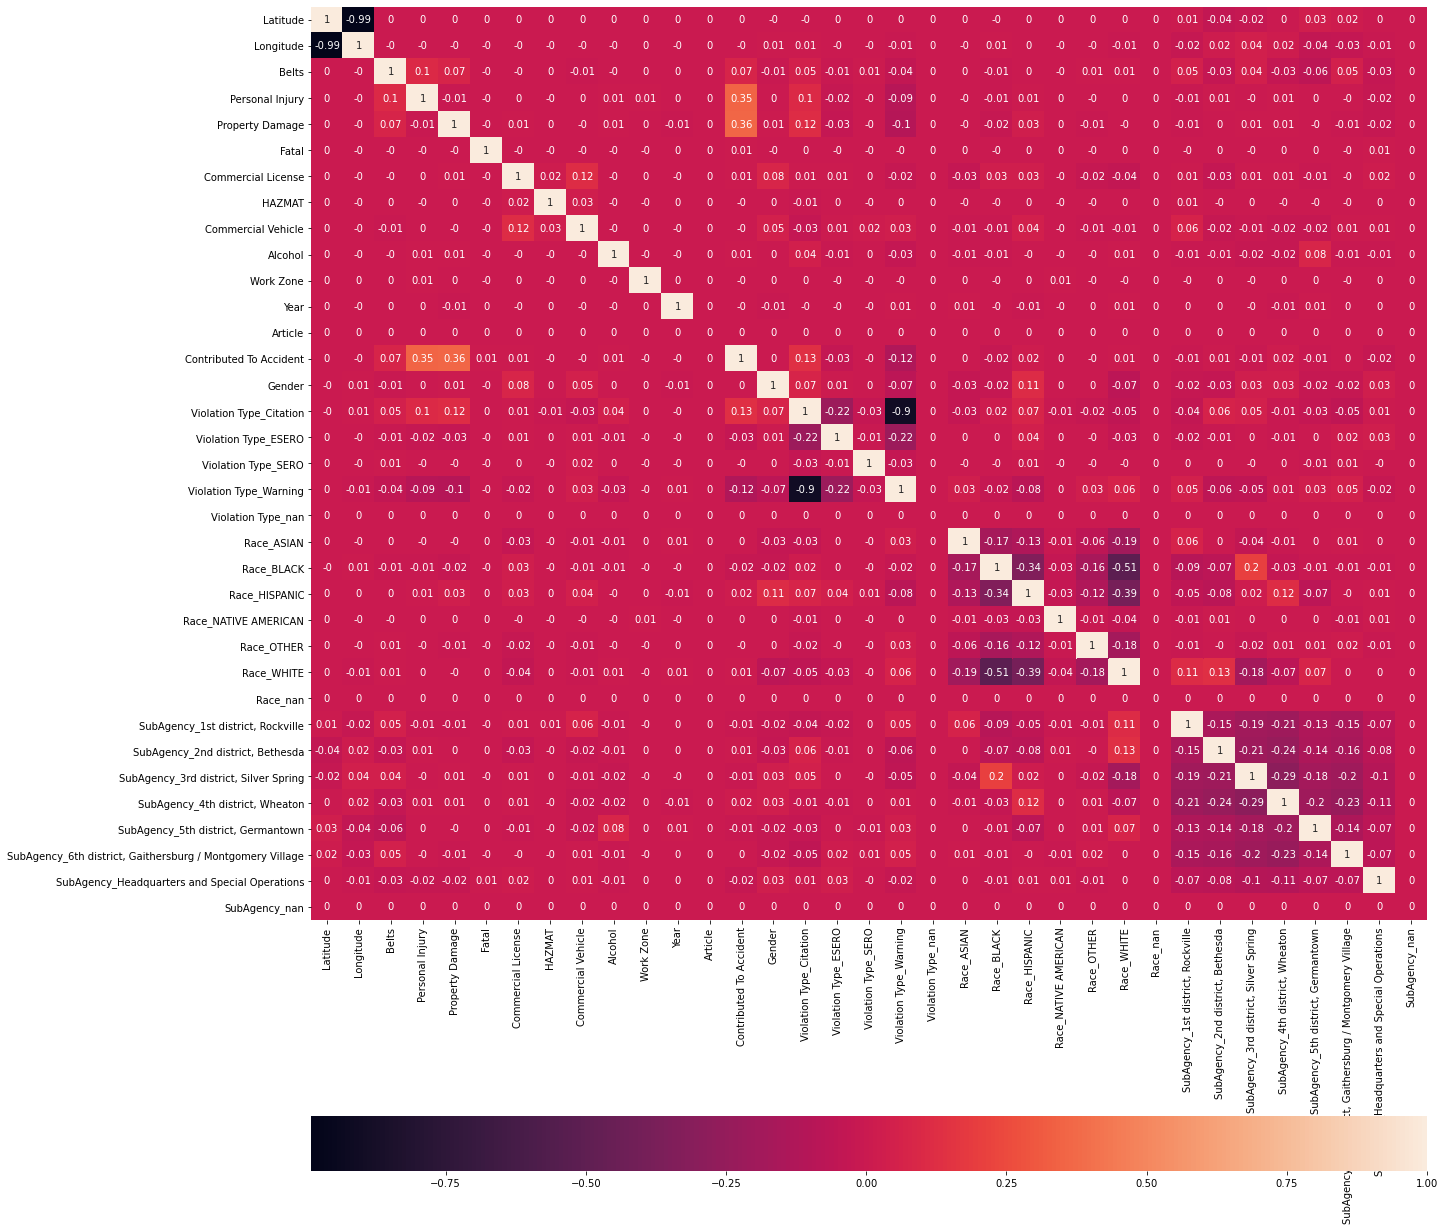

In [82]:
plt.figure(figsize=[20,24])
sns.heatmap(corr, annot = True, cbar_kws={"orientation": "horizontal", 'shrink': 1})

Out of 35 variable only 3 variables are quite correlated, other are very less correlated. Personal Injury and Property damaage are related to Contributed to Accedent.